In [1]:
using PyPlot, MDToolbox
PyPlot.plt.style.use("seaborn-colorblind");
ENV["COLUMNS"] = 150; #display width for MDToolbox

In [2]:
t_closed = mdload("data/md_adk/closed.pdb")

1x214 TrjArray{Float64, Int64}
| A                          | A                          | A                          |  …   A                          | A                          |
| 1MET                       | 2ARG                       | 3ILE                       |  …   213LEU                     | 214GLY                     |
| 2CA                        | 10CA                       | 21CA                       |  …   1650CA                     | 1658CA                     |
|     9.97    -9.03     9.82 |    10.38    -6.71     6.85 |     7.60    -6.67     4.34 |  …       4.71   -15.48     6.74 |     5.09   -17.11     9.36 |

In [3]:
natom = t_closed.natom
d = zeros(Float64, natom, natom)
for i = 1:natom
    for j = 1:natom
        d[i, j] = sqrt(sum((t_closed[1, i].xyz .- t_closed[1, j].xyz).^2))
    end
end

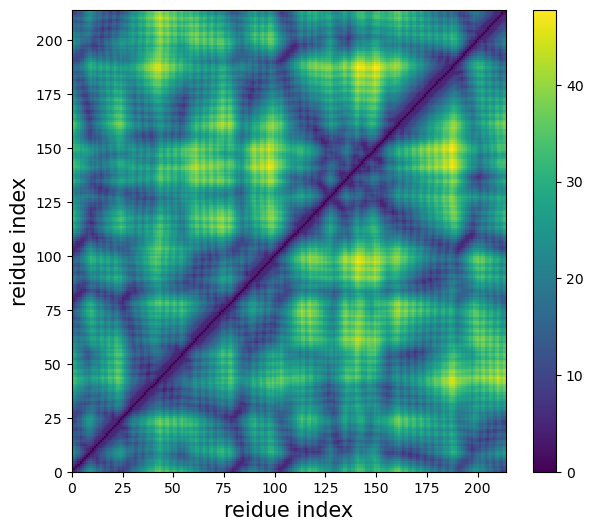

In [4]:
fig, ax = subplots(figsize=(7, 6));
pcolor(d)
colorbar()
xlabel("reidue index", fontsize=15)
ylabel("reidue index", fontsize=15)
savefig("principal_component_analysis_distancemap.png", dpi=200)

In [5]:
t = mdload("data/md_adk/run.nc", top=t_closed)

20000x214 TrjArray{Float64, Int64}
| A                          | A                          | A                          |  …   A                          | A                          |
| 1MET                       | 2ARG                       | 3ILE                       |  …   213LEU                     | 214GLY                     |
| 2CA                        | 10CA                       | 21CA                       |  …   1650CA                     | 1658CA                     |
|     0.01    17.58     8.30 |     1.70    14.27     9.20 |     0.65    11.01     7.67 |  …      -8.40    13.66     9.10 |   -10.49    16.81     8.96 |
|    -0.06    17.26     8.54 |     2.00    14.04     8.56 |     0.44    10.84     7.39 |         -8.59    13.96     8.62 |   -10.21    17.38     8.81 |
|    -0.31    17.06     7.99 |     2.05    14.15     8.76 |     0.67    10.80     7.80 |         -8.46    13.68     8.40 |    -9.88    17.18     8.51 |
|    -0.95    17.10     9.79 |     1.55    14.26     

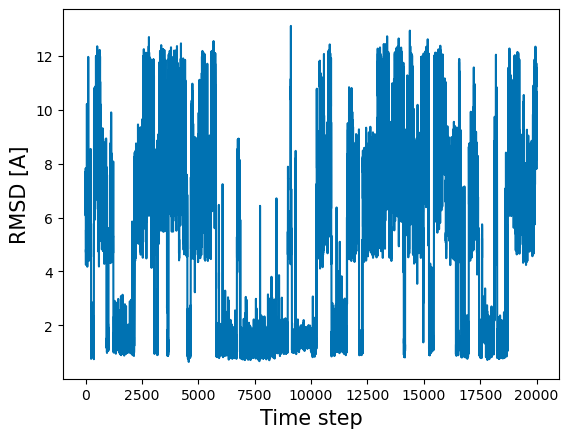

In [6]:
t = superimpose(t_closed, t)
rmsd = compute_rmsd(t_closed, t)
plot(rmsd)
xlabel("Time step",fontsize=15)
ylabel("RMSD [A]",fontsize=15)
savefig("principal_component_analysis_rmsd.png", dpi=200)

In [7]:
X = compute_distancemap(t)

20000×22366 Matrix{Float64}:
 10.3332  12.6005  16.1304  19.4085  23.0044  25.2116  26.1396  23.6243  21.6528  …  10.3808   5.05667  6.25391  8.25971  5.2465   5.41024  5.82211
 10.2117  12.5286  15.9796  19.2654  22.8531  24.9747  25.3714  23.4395  21.6238     10.4545   4.85314  5.87168  8.28831  4.93575  5.49904  6.17932
 10.0946  12.4113  15.9741  19.0246  22.5432  24.5106  26.2008  23.311   21.6304     10.4601   5.04529  5.91033  8.33872  5.19636  5.75339  6.40843
 10.2821  12.5055  15.9897  19.3105  22.8226  24.9025  25.4903  23.2641  21.7445     10.1737   5.15982  6.19921  8.37272  5.21341  5.59676  5.63167
 10.2352  12.7682  16.2028  19.5219  22.9709  24.9877  26.0572  23.523   21.4284     10.0093   5.07802  6.2383   8.23774  5.04611  5.22985  5.79254
 10.1442  12.4723  15.9889  19.2758  22.6288  24.4926  25.8511  23.1934  21.2855  …  10.3997   5.00318  5.81743  8.17137  5.39351  5.78911  5.86
 10.1114  12.4345  15.9675  19.2173  22.8161  24.3035  26.083   24.1113  22.3047     1

In [8]:
# Principal component analysis of distance-map vectors
PCA = pca(X, k=30)

(projection = [-320.933724389838 -46.6504819132619 … 2.23987144243903 7.367047043641027; -207.56955245513325 -141.5476892298903 … -4.609026040734609 -8.099861784291836; … ; -627.1748528808321 124.1671296119545 … -8.066222469195342 5.0106381929321415; -702.4690356879572 176.52441407120475 … 7.382123401717789 -7.327762312182077], mode = [-8.279308550211666e-6 -8.890953328252233e-6 … -0.0006489460024802312 -5.2858106839119855e-5; -3.60642465478334e-5 -3.670286827643415e-6 … -0.002020591447930489 0.0003655557864361467; … ; 6.45309773445296e-5 0.0002093981436138772 … -0.001949041464263362 0.0006463736776442858; 5.4467813613903056e-5 0.00021499443398464318 … -0.0005064281425624414 0.00019028724252402222], variance = [3.304722138354278e6, 23319.29069434674, 10320.425941677364, 4414.799123353644, 752.9200368968008, 199.67151078856182, 184.74397611843884, 46.64039510190136, 21.076724240243557, 16.95642379213512  …  0.4710161682493454, 0.3465472118599377, 0.29549520684739383, 0.20434666583417657

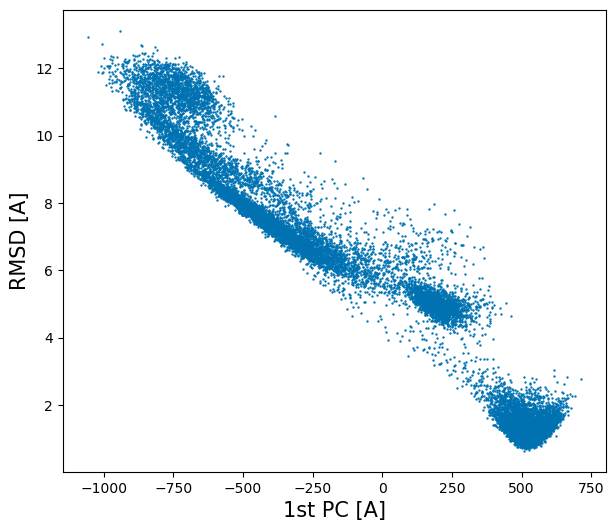

In [9]:
# Scatter plots of RMSD, PC1, and PC2
fig, ax = subplots(figsize=(7, 6))
ax.scatter(PCA.projection[:, 1], rmsd, s=0.5)
xlabel("1st PC [A]",fontsize=15)
ylabel("RMSD [A]",fontsize=15)
savefig("principal_component_analysis_pc1_rmsd.png", dpi=200)

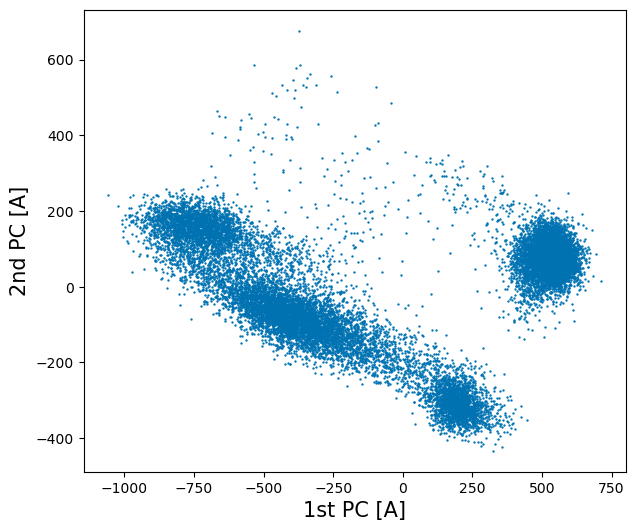

In [10]:
fig, ax = subplots(figsize=(7, 6))
ax.scatter(PCA.projection[:, 1], PCA.projection[:, 2], s=0.5)
xlabel("1st PC [A]",fontsize=15)
ylabel("2nd PC [A]",fontsize=15)
savefig("principal_component_analysis_pc1_pc2.png", dpi=200)

In [11]:
# check the structures in some PC1 region
index = findall(x -> x > 400.0,  PCA.projection[:, 1])
mdsave("tmp.pdb", t[index[1:10], :]);
run(`pymol tmp.pdb`);

 PyMOL(TM) Molecular Graphics System, Version 2.4.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Detected OpenGL version 2.1. Shaders available.
 Detected GLSL version 1.20.
 OpenGL graphics engine:
  GL_VENDOR:   ATI Technologies Inc.
  GL_RENDERER: AMD Radeon Pro Vega 64 OpenGL Engine
  GL_VERSION:  2.1 ATI-4.5.14
No module named '_tkinter'
Unable 